# About Data

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD (Central Bussiness District) in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

CouncilArea: Governing council for the area

In [1]:
# Importing libraries and modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import datetime
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Reading the file into a dataframe
house_df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
# Looking at the first 5 entries
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
# Get a quick information about the dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
# Checking number of Unique attributes of each column
house_df.nunique()

Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

In [6]:
# we need to check irrelavent spaces in the column names because, 
# Even one space in the column name will create a confusion in the future
house_df.columns
# Fortunately we didn't have any space

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [7]:
# Checking the null values
house_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [8]:
# Drop the rows with null values
house_df.dropna(inplace= True)

# Exploratory Data Analysis

<Axes: >

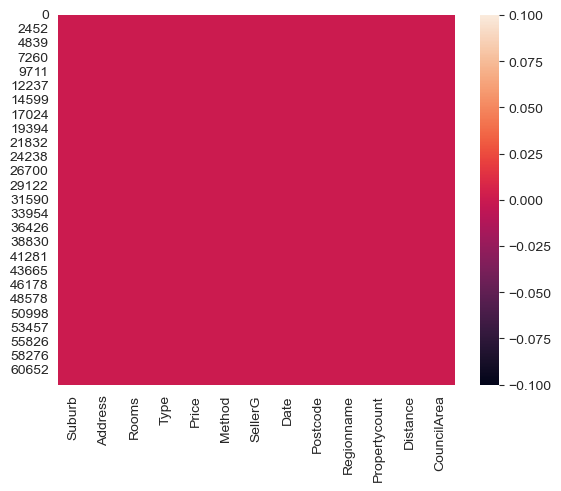

In [9]:
sns.heatmap(house_df.isnull())

In [10]:
# Checking for duplicates
house_df.duplicated().sum()

1

In [11]:
# Dropping Duplicates
house_df.drop_duplicates(inplace = True)

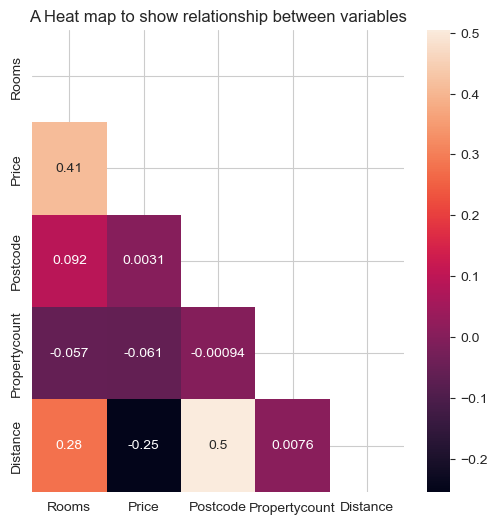

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(house_df.corr(),
            annot=True,
            mask=np.triu(np.ones_like(house_df.corr()))).set(title='A Heat map to show relationship between variables');

Prices are correlated with Rooms column 

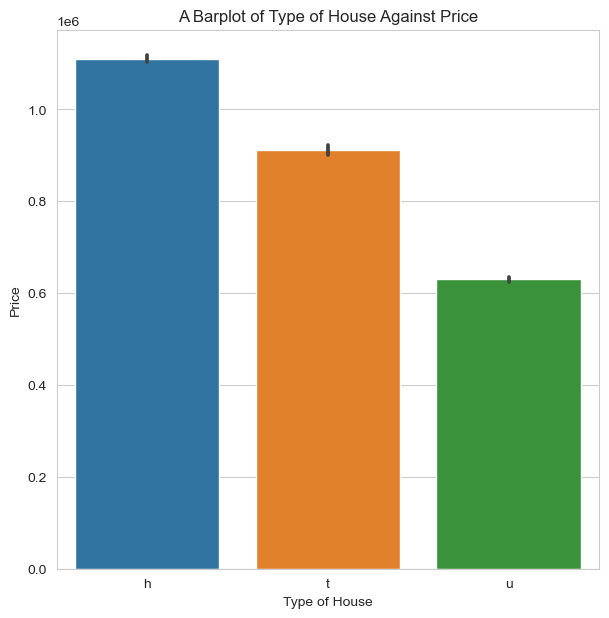

In [13]:
# Showing the relationship between the type of house and prices
plt.figure(figsize=(7,7))
sns.barplot(data=house_df, x='Type', y='Price').set(title='A Barplot of Type of House Against Price', xlabel='Type of House');

From the chart, we can infer that the type of House or building has a significant impact of price since the type of building can lead to a high or low price of the house

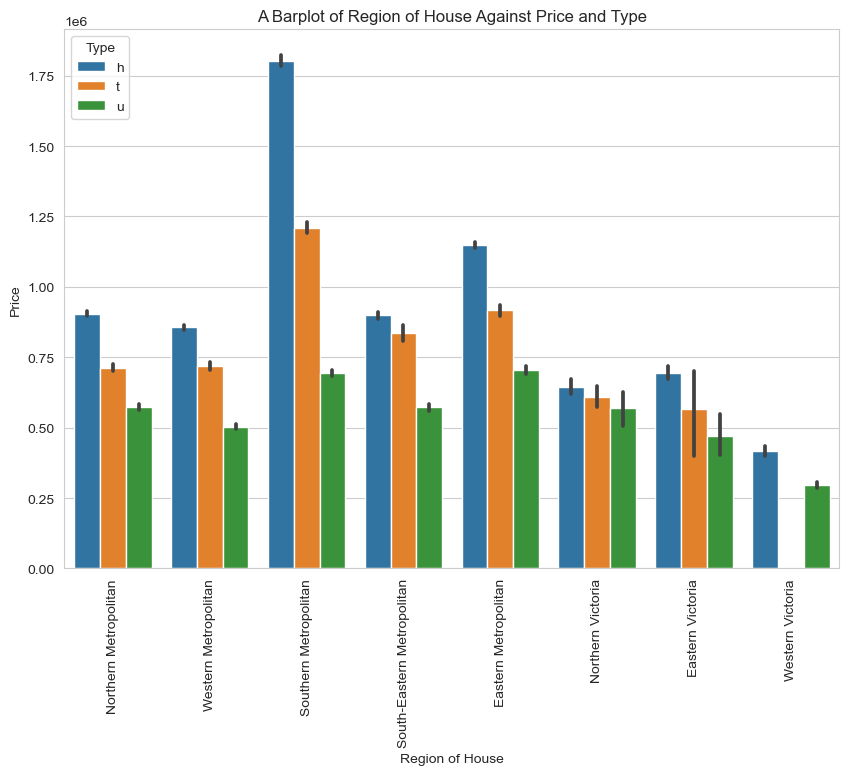

In [14]:
# Checking prices in relation with region names
plt.figure(figsize=(10,7))
sns.barplot(data=house_df, x='Regionname', y='Price', hue='Type').set(title='A Barplot of Region of House Against Price and Type', xlabel='Region of House')
plt.xticks(rotation=90);

<p>From the Chart above, we can infer that the region of a particular building really affects the price on the house</p>
<p>For example, the average price of house, cottage, villa, semi terrace is really high in the Southern Metropolitan as compared to the average price of same building in the other regions</p>

[Text(0.5, 1.0, 'Bar plot of No. Rooms against Price'),
 Text(0.5, 0, 'No. Rooms')]

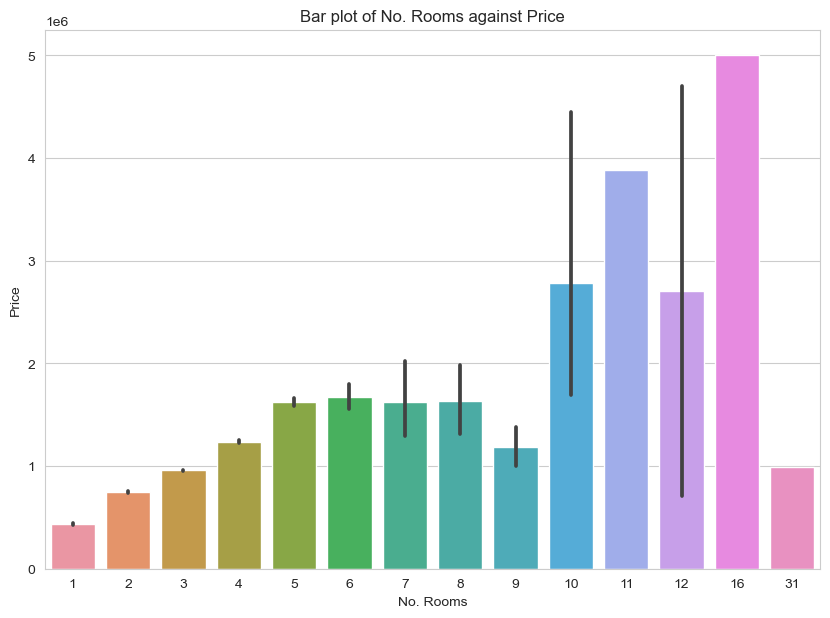

In [15]:
# Plotting the relationship between Rooms and Price
plt.figure(figsize=(10,7))
sns.barplot(data = house_df,x='Rooms',y='Price').set(title = 'Bar plot of No. Rooms against Price',xlabel = 'No. Rooms')

From this chart we can see No. Rooms slightly affects the Price

[Text(0.5, 1.0, 'Scatter plot of Distance against Price'),
 Text(0.5, 0, 'Distance from CBD')]

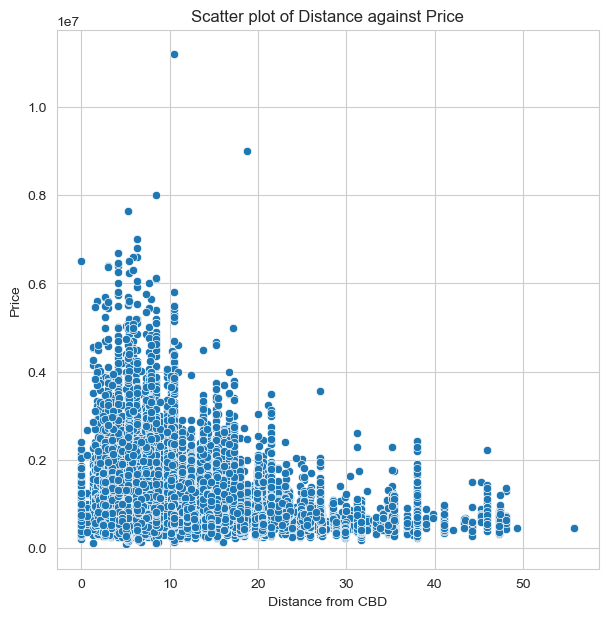

In [16]:
# Plotting the relationship between Distance from CBD and Price 
plt.figure(figsize=(7,7))
sns.scatterplot(data = house_df,x='Distance',y='Price').set(title = 'Scatter plot of Distance against Price',xlabel = 'Distance from CBD')

From the above chart we can understand prices are increasing while the Distance from the central bussiness district is decreasing 

# Data Preprocessing

In [17]:
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [18]:
# Some of the columns are not helpful to creation of the model so it should be dropped
columns_to_be_dropped = ['Suburb','Address','Method','SellerG','Propertycount','CouncilArea','Date']
house_df.drop(columns_to_be_dropped,axis = 'columns' ,inplace = True)
house_df.head()

,Rooms,Type,Price,Postcode,Regionname,Distance
0,3,h,1490000.0,3067,Northern Metropolitan,3.0
1,3,h,1220000.0,3067,Northern Metropolitan,3.0
2,3,h,1420000.0,3067,Northern Metropolitan,3.0
3,3,h,1515000.0,3040,Western Metropolitan,7.5
4,2,h,670000.0,3042,Western Metropolitan,10.4


In [19]:
# Converting the type column to numerical values
le = LabelEncoder()
house_df['Type'] = le.fit_transform(house_df['Type'].values)

In [20]:
# Create dummy variables for categorical variables
dummies = pd.get_dummies(house_df['Regionname'])

In [21]:
# Concatinating the dummy variables with the dataframe
house_df = pd.concat([house_df, dummies], axis=1)

# Dropping the original Region name column
house_df.drop('Regionname', axis = 1, inplace=True)

In [22]:
house_df.head()

,Rooms,Type,Price,Postcode,Distance,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,3,0,1490000.0,3067,3.0,0,0,1,0,0,0,0,0
1,3,0,1220000.0,3067,3.0,0,0,1,0,0,0,0,0
2,3,0,1420000.0,3067,3.0,0,0,1,0,0,0,0,0
3,3,0,1515000.0,3040,7.5,0,0,0,0,0,0,1,0
4,2,0,670000.0,3042,10.4,0,0,0,0,0,0,1,0


# Model Building

In [23]:
# Choosing features and target variables
features = house_df.drop('Price',axis=1)
target = house_df['Price']

In [24]:
# Split the datasets into train and test data 
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [25]:
# Creating the dictionary of models and their parameters to perform hyperparameter tuning 
model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[10,20,50,100],
            'random_state':[0,42]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,20,50,100,200]
        }
    },
    'Ridge_regression':{
        'model':Ridge(tol=0.1),
        'params':{
             'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    },
    'Lasso_regression':{
        'model':Lasso(tol=0.1),
        'params':{
            'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    }
    
    
}

In [26]:
# Doing Hyperparameter Tuning with the help of Grid Search CV
score=[]
best_score = 0
second_best_score = 0
best_model = None        # This is the best model in the end of the grid search cv
second_best_model = None #This is the second best model in the end of the grid search cv
for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5)
    clf.fit(x_train,y_train)
    
    if best_score<clf.best_score_:
        second_best_score =  best_score
        second_best_model =  best_model
        best_score = clf.best_score_
        best_model = clf.best_estimator_
    elif clf.best_score_>second_best_score:
        second_best_score = clf.best_score_
        second_best_model = clf.best_estimator_
    
    score.append({
        'model':model_name,
        'score':clf.best_score_,
        'param':clf.best_params_
    })
    

In [27]:
# Dataframe the best parameters for all models and their scores
pd.DataFrame(score)

,model,score,param
0,linear_regression,0.526222,{}
1,Decision_Tree,0.723645,"{'max_depth': 50, 'random_state': 0}"
2,Random_Forest,0.731674,{'n_estimators': 20}
3,Ridge_regression,0.526222,"{'alpha': 1, 'max_iter': 50}"
4,Lasso_regression,0.526222,"{'alpha': 1, 'max_iter': 50}"


In [28]:
# best_model is Random Forest Regressor 
best_model.score(x_test,y_test)

0.6981060255050102

In [29]:
# second_best_model is Decision Tree Regressor
second_best_model.score(x_test,y_test)

0.6946509111476942

In [30]:
# Creating the dictionary of models for calculating the mean squared error and root mean squared error
models = {
     'Random_Forest_Regressor':best_model,
    'Decision_Tree_regressor':second_best_model
}

In [31]:
# Calculating the mean squared error and root mean squared error
result=[]
for model_name,model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    
    result.append({
        'Model':model_name,
        'MSE':mse,
        'RMSE':rmse
    }) 

In [32]:
# Data Frame the result of the errors with their model names
pd.DataFrame(result)

,Model,MSE,RMSE
0,Random_Forest_Regressor,1.057438e+11,325182.717509
1,Decision_Tree_regressor,1.069540e+11,327038.248184


In [33]:
# After calculating the errors this model gives the least error
best_model

RandomForestRegressor(n_estimators=20)